In [23]:
# data processing
import pandas as pd

#linear algebra
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#regex
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn import metricsfrom sklearn.metrics import classification_report 

#Algorithms

In [24]:
#online_coupon train data
df_on=pd.read_csv("ccf_online_stage1_train.csv")

#offline_coupon train data
df_off=pd.read_csv("ccf_offline_stage1_train.csv")

x = 'Null'
df_off_unique = (df_off.fillna(x).groupby(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received', 'Date']).size().reset_index().rename(columns={0 : 'Count'}).replace(x,np.NaN))
df_off_unique

#offline_coupon test data
df_off_test=pd.read_csv("ccf_offline_stage1_test_revised.csv")

In [25]:
df_off_unique.drop(['Count'],axis=1,inplace=True)

In [4]:
df_off_unique.drop(df_off_unique[df_off_unique['Date_received'].isna()].index, inplace = True) 
df_off_unique

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,4,1433,8735.0,30:5,10.0,20160214.0,NaN
1,4,1469,2902.0,0.95,10.0,20160607.0,NaN
2,35,3381,1807.0,300:30,0.0,20160130.0,NaN
3,35,3381,9776.0,10:5,0.0,20160129.0,NaN
4,35,3381,11951.0,200:20,0.0,20160129.0,NaN
...,...,...,...,...,...,...,...
1716984,7360967,3103,2375.0,30:1,2.0,20160120.0,NaN
1716987,7360967,6485,10323.0,20:5,1.0,20160322.0,NaN
1716988,7361024,1433,8735.0,30:5,10.0,20160211.0,NaN
1716989,7361032,2146,11173.0,100:10,2.0,20160129.0,NaN


In [5]:
df_off_unique['Date'] = pd.to_datetime(df_off_unique['Date'],format="%Y%m%d")
df_off_unique['Date_received'] = pd.to_datetime(df_off_unique['Date_received'],format="%Y%m%d")

df_off_unique["Redeem_date"]=df_off_unique["Date"].dt.date-df_off_unique["Date_received"].dt.date
df_off_unique["Redeem_date"]=df_off_unique["Date"].dt.date-df_off_unique["Date_received"].dt.date
df_off_unique['Redeem_date'] = df_off_unique['Redeem_date'].dt.days.astype('str')
df_off_unique['Redeem_date'] = pd.to_numeric(df_off_unique['Redeem_date'],errors="coerce")



split_data = df_off_unique["Discount_rate"].str.split(":")
data = split_data.to_list()


for i in range(len(data)):
    if len(data[i])==1:
        data[i].insert(1,100-float(data[i][0])*100)
        data[i][0]=100
        

df_off_unique['temp']=data
df_off_unique[['Original_Price','Discounted_price']] = pd.DataFrame(df_off_unique.temp.values.tolist(), index= df_off_unique.index)
df_off_unique["Original_Price"]=df_off_unique["Original_Price"].astype(float)
df_off_unique["Discounted_price"]=df_off_unique["Discounted_price"].astype(float)
df_off_unique["Rate"]=round((df_off_unique["Original_Price"]-df_off_unique["Discounted_price"])/df_off_unique["Original_Price"],3)
del df_off_unique["temp"] 

df_off_unique

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Redeem_date,Original_Price,Discounted_price,Rate
0,4,1433,8735.0,30:5,10.0,2016-02-14,NaT,NaN,30.0,5.0,0.833
1,4,1469,2902.0,0.95,10.0,2016-06-07,NaT,NaN,100.0,5.0,0.950
2,35,3381,1807.0,300:30,0.0,2016-01-30,NaT,NaN,300.0,30.0,0.900
3,35,3381,9776.0,10:5,0.0,2016-01-29,NaT,NaN,10.0,5.0,0.500
4,35,3381,11951.0,200:20,0.0,2016-01-29,NaT,NaN,200.0,20.0,0.900
...,...,...,...,...,...,...,...,...,...,...,...
1716984,7360967,3103,2375.0,30:1,2.0,2016-01-20,NaT,NaN,30.0,1.0,0.967
1716987,7360967,6485,10323.0,20:5,1.0,2016-03-22,NaT,NaN,20.0,5.0,0.750
1716988,7361024,1433,8735.0,30:5,10.0,2016-02-11,NaT,NaN,30.0,5.0,0.833
1716989,7361032,2146,11173.0,100:10,2.0,2016-01-29,NaT,NaN,100.0,10.0,0.900


In [6]:
df_off_unique["Redeem_date"].fillna(-1, inplace = True) 
df_off_unique["Distance"].fillna(df_off_unique["Distance"].mean(), inplace = True) 

In [7]:
df_off_unique["Target"]=0
df_off_unique.loc[(df_off_unique["Redeem_date"]<=15) & (df_off_unique["Redeem_date"]>=0), 'Target'] = 1 
df_off_unique

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Redeem_date,Original_Price,Discounted_price,Rate,Target
0,4,1433,8735.0,30:5,10.0,2016-02-14,NaT,-1.0,30.0,5.0,0.833,0
1,4,1469,2902.0,0.95,10.0,2016-06-07,NaT,-1.0,100.0,5.0,0.950,0
2,35,3381,1807.0,300:30,0.0,2016-01-30,NaT,-1.0,300.0,30.0,0.900,0
3,35,3381,9776.0,10:5,0.0,2016-01-29,NaT,-1.0,10.0,5.0,0.500,0
4,35,3381,11951.0,200:20,0.0,2016-01-29,NaT,-1.0,200.0,20.0,0.900,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1716984,7360967,3103,2375.0,30:1,2.0,2016-01-20,NaT,-1.0,30.0,1.0,0.967,0
1716987,7360967,6485,10323.0,20:5,1.0,2016-03-22,NaT,-1.0,20.0,5.0,0.750,0
1716988,7361024,1433,8735.0,30:5,10.0,2016-02-11,NaT,-1.0,30.0,5.0,0.833,0
1716989,7361032,2146,11173.0,100:10,2.0,2016-01-29,NaT,-1.0,100.0,10.0,0.900,0


In [26]:
df_train=pd.read_csv("Train_data.csv")
df_train

,Unnamed: 0,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Redeem_date,Original_Price,Discounted_price,Rate,Target,Coupon_receive_count,Coupon_redeem_count,User_Redeem_Receive_Ratio,User_avg_distance,No_of_Clicks,No_of_Buy,No_of_Get_Coupons
0,0,4,1433,8735.0,30:5,10.0,2016-02-14,NaN,-1.0,30.0,5.0,0.833,0,2,0,0.0,10.000000,2,2,2
1,1,4,1469,2902.0,0.95,10.0,2016-06-07,NaN,-1.0,100.0,5.0,0.950,0,2,0,0.0,10.000000,2,2,2
2,2,36,1041,13490.0,30:5,4.0,2016-01-25,NaN,-1.0,30.0,5.0,0.833,0,2,0,0.0,6.000000,1,1,1
3,3,36,5717,12349.0,20:5,8.0,2016-01-25,NaN,-1.0,20.0,5.0,0.750,0,2,0,0.0,6.000000,1,1,1
4,4,64,2146,11173.0,100:10,2.0,2016-01-29,NaN,-1.0,100.0,10.0,0.900,0,1,0,0.0,2.000000,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526996,526996,7360967,3103,2375.0,30:1,2.0,2016-01-10,NaN,-1.0,30.0,1.0,0.967,0,3,0,0.0,1.666667,94,94,94
526997,526997,7360967,3103,2375.0,30:1,2.0,2016-01-20,NaN,-1.0,30.0,1.0,0.967,0,3,0,0.0,1.666667,94,94,94
526998,526998,7360967,6485,10323.0,20:5,1.0,2016-03-22,NaN,-1.0,20.0,5.0,0.750,0,3,0,0.0,1.666667,94,94,94
526999,526999,7361032,2146,11173.0,100:10,2.0,2016-01-29,NaN,-1.0,100.0,10.0,0.900,0,2,0,0.0,5.000000,1,1,1


In [27]:
df_train.columns

Index(['Unnamed: 0', 'User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate',
       'Distance', 'Date_received', 'Date', 'Redeem_date', 'Original_Price',
       'Discounted_price', 'Rate', 'Target', 'Coupon_receive_count',
       'Coupon_redeem_count', 'User_Redeem_Receive_Ratio', 'User_avg_distance',
       'No_of_Clicks', 'No_of_Buy', 'No_of_Get_Coupons'],
      dtype='object')

In [29]:
feature_names=['Distance', 'Original_Price',
       'Discounted_price', 'Rate', 'Coupon_receive_count',
       'Coupon_redeem_count', 'User_Redeem_Receive_Ratio', 'User_avg_distance',
       'No_of_Clicks', 'No_of_Buy', 'No_of_Get_Coupons']
X = df_train[feature_names]
Y = df_train['Target']

In [30]:
X

,Distance,Original_Price,Discounted_price,Rate,Coupon_receive_count,Coupon_redeem_count,User_Redeem_Receive_Ratio,User_avg_distance,No_of_Clicks,No_of_Buy,No_of_Get_Coupons
0,10.0,30.0,5.0,0.833,2,0,0.0,10.000000,2,2,2
1,10.0,100.0,5.0,0.950,2,0,0.0,10.000000,2,2,2
2,4.0,30.0,5.0,0.833,2,0,0.0,6.000000,1,1,1
3,8.0,20.0,5.0,0.750,2,0,0.0,6.000000,1,1,1
4,2.0,100.0,10.0,0.900,1,0,0.0,2.000000,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
526996,2.0,30.0,1.0,0.967,3,0,0.0,1.666667,94,94,94
526997,2.0,30.0,1.0,0.967,3,0,0.0,1.666667,94,94,94
526998,1.0,20.0,5.0,0.750,3,0,0.0,1.666667,94,94,94
526999,2.0,100.0,10.0,0.900,2,0,0.0,5.000000,1,1,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [38]:
from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
#y_test=np.array(y_test).reshape(-1)
results = confusion_matrix(y_test, y_pred) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print (classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix :
[[97792  1056]
 [ 3475  3078]]
Accuracy Score : 0.9570117930569919
Report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     98848
           1       0.74      0.47      0.58      6553

    accuracy                           0.96    105401
   macro avg       0.86      0.73      0.78    105401
weighted avg       0.95      0.96      0.95    105401



ROC AUC Score of Probailities:  0.73
ROC AUC Curve


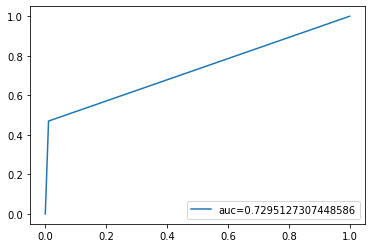

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
roc_score = round(roc_auc_score(y_test, y_pred), 3)

print('ROC AUC Score of Probailities:  '+ str(roc_score))
print('ROC AUC Curve')
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [12]:
'''from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yval1, logreg.predict(xval1))
fpr, tpr, thresholds = roc_curve(yval1, logreg.predict_proba(xval1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()'''

'from sklearn.metrics import roc_auc_score\nfrom sklearn.metrics import roc_curve\nlogit_roc_auc = roc_auc_score(yval1, logreg.predict(xval1))\nfpr, tpr, thresholds = roc_curve(yval1, logreg.predict_proba(xval1)[:,1])\nplt.figure()\nplt.plot(fpr, tpr, label=\'Logistic Regression (area = %0.2f)\' % logit_roc_auc)\nplt.plot([0, 1], [0, 1],\'r--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver operating characteristic\')\nplt.legend(loc="lower right")\nplt.savefig(\'Log_ROC\')\nplt.show()'

In [33]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[96419  2311]
 [ 3292  3379]]
Accuracy Score : 0.9468411115644064
Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     98730
           1       0.59      0.51      0.55      6671

    accuracy                           0.95    105401
   macro avg       0.78      0.74      0.76    105401
weighted avg       0.94      0.95      0.94    105401



In [34]:
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

#Prediction
y_pred=clf.predict(X_test)
#df_off_unique.loc[(df_off_unique["Redeem_date"]<=15) & (df_off_unique["Redeem_date"]>=0), 'Target'] = 1 
y_pred = (y_pred >= 0.5).astype(int)

#convert into binary values
#for i in range(len(y_pred)):
#    if y_pred[i]>=.5:       # setting threshold to .5
#        y_pred[i]=1
#    else:  
#        y_pred[i]=0

cm = confusion_matrix(y_test, y_pred)

print ('Confusion Matrix :')
print (cm) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[98768     0]
 [ 6633     0]]
Accuracy Score : 0.9370689082646275
Report : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     98768
           1       0.00      0.00      0.00      6633

    accuracy                           0.94    105401
   macro avg       0.47      0.50      0.48    105401
weighted avg       0.88      0.94      0.91    105401



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix :
[[97833  1081]
 [ 3186  3301]]
Accuracy Score : 0.9595165131260615
Report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     98914
           1       0.75      0.51      0.61      6487

    accuracy                           0.96    105401
   macro avg       0.86      0.75      0.79    105401
weighted avg       0.96      0.96      0.96    105401



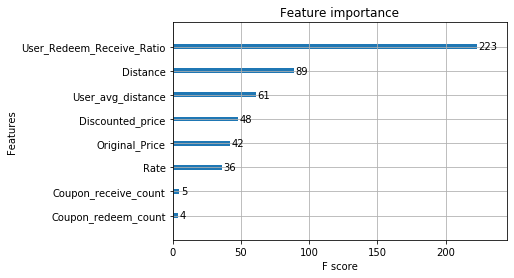

In [44]:
from xgboost import XGBClassifier
from xgboost import plot_importance
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)

results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print (classification_report(y_test, y_pred))

plot_importance(model)
plt.show()
#predictions = [round(value) for value in y_pred]
# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

ROC AUC Score of Probailities:  0.741
ROC AUC Curve


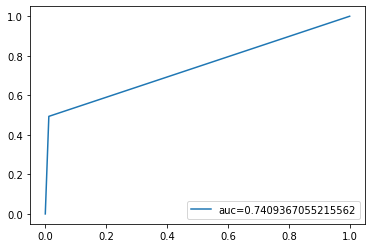

In [43]:

roc_score = round(roc_auc_score(y_test, y_pred), 3)

print('ROC AUC Score of Probailities:  '+ str(roc_score))
print('ROC AUC Curve')
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [16]:
'''from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print (classification_report(y_test, y_pred))'''

"from sklearn.svm import SVC\nsvm = SVC()\nsvm.fit(X_train, y_train)\ny_pred = svm.predict(X_test)\n\nresults = confusion_matrix(y_test, y_pred) \nprint ('Confusion Matrix :')\nprint(results) \nprint ('Accuracy Score :',accuracy_score(y_test, y_pred))\nprint ('Report : ')\nprint (classification_report(y_test, y_pred))"

In [36]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="hinge", penalty="l2")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print (classification_report(y_test, y_pred))




Confusion Matrix :
[[95290  3558]
 [ 1974  4579]]
Accuracy Score : 0.9475147294617698
Report : 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     98848
           1       0.56      0.70      0.62      6553

    accuracy                           0.95    105401
   macro avg       0.77      0.83      0.80    105401
weighted avg       0.95      0.95      0.95    105401



In [37]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print (classification_report(y_test, y_pred))


Confusion Matrix :
[[96662  2186]
 [ 3031  3522]]
Accuracy Score : 0.9505033159078187
Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     98848
           1       0.62      0.54      0.57      6553

    accuracy                           0.95    105401
   macro avg       0.79      0.76      0.77    105401
weighted avg       0.95      0.95      0.95    105401



In [21]:
y_test.value_counts()

0    190648
1     12430
Name: Target, dtype: int64